#Preparing and Exploring Image Data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision

In [0]:
# !unzip '/content/drive/My Drive/Colab Notebooks/Udacity_DL/Dataset/MNIST-Dataset/mnist-in-csv.zip' -d '/content/drive/My Drive/Colab Notebooks/Udacity_DL/Dataset/MNIST-Dataset'

In [0]:
mnist_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Udacity_DL/Dataset/MNIST-Dataset/mnist_train.csv')
mnist_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Udacity_DL/Dataset/MNIST-Dataset/mnist_test.csv')

In [40]:
mnist_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
mnist_train.shape, mnist_test.shape

((60000, 785), (10000, 785))

Drop all empty fileds

In [0]:
mnist_train = mnist_train.dropna()
mnist_test = mnist_test.dropna()

In [43]:
random_sel = mnist_train.sample(8)

random_sel.shape

(8, 785)

In [44]:
img_features = random_sel.drop('label', axis=1)

img_batch = (torch.Tensor(img_features.values/255,)).reshape(-1, 28, 28)

img_batch.shape

torch.Size([8, 28, 28])

In [45]:
img_batch.unsqueeze(1).shape

torch.Size([8, 1, 28, 28])

In [46]:
grid = torchvision.utils.make_grid(img_batch.unsqueeze(1), nrow=8)

grid.shape

torch.Size([3, 32, 242])

(-0.5, 241.5, 31.5, -0.5)

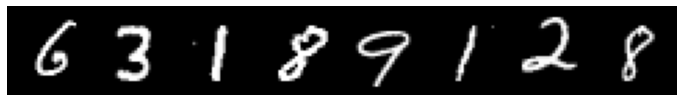

In [47]:
plt.figure(figsize = (12, 12))

plt.imshow(grid.numpy().transpose((1, 2, 0)))

plt.axis('off')

In [0]:
mnist_train_features = mnist_train.drop('label', axis=1)
mnist_train_target = mnist_train['label']

mnist_test_features = mnist_test.drop('label', axis=1)
mnist_test_target = mnist_test['label']

In [0]:
X_train_tensor = torch.tensor(mnist_train_features.values, dtype=torch.float)
Y_train_tensor = torch.tensor(mnist_train_target.values, dtype=torch.long)

X_test_tensor = torch.tensor(mnist_test_features.values, dtype=torch.float)
Y_test_tensor = torch.tensor(mnist_test_target.values, dtype=torch.long)

In [50]:
X_train_tensor.shape, X_test_tensor.shape, Y_train_tensor.shape, Y_test_tensor.shape

(torch.Size([60000, 784]),
 torch.Size([10000, 784]),
 torch.Size([60000]),
 torch.Size([10000]))

In [0]:
X_train_tensor = X_train_tensor.reshape(-1, 1, 28, 28)
X_test_tensor = X_test_tensor.reshape(-1, 1, 28, 28)

In [52]:
X_train_tensor.shape, X_test_tensor.shape, Y_train_tensor.shape, Y_test_tensor.shape

(torch.Size([60000, 1, 28, 28]),
 torch.Size([10000, 1, 28, 28]),
 torch.Size([60000]),
 torch.Size([10000]))

#Setting CNN Model

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [0]:
in_size = 1

hid1_size = 16
hid2_size = 32

out_size = 10

k_conv_size = 5

In [0]:
class ConvNet(nn.Module):

  def __init__(self):
    super(ConvNet, self).__init__()
    
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_size, hid1_size, k_conv_size),
        nn.BatchNorm2d(hid1_size),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )

    self.layer2 = nn.Sequential(
        nn.Conv2d(hid1_size, hid2_size, k_conv_size),
        nn.BatchNorm2d(hid2_size),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )

    self.fc = nn.Linear(512, out_size)

  def forward(self, x):

    out = self.layer1(x)
    print(out.shape)

    out = self.layer2(out)
    print(out.shape)

    out = out.reshape(out.size(0), -1)
    print(out.shape)

    out = self.fc(out)
    print(out.shape)

    return out

In [0]:
model = ConvNet()

In [79]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cuda:0


In [0]:
model = model.to(device)

In [0]:
X_train_tensor = X_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
Y_train_tensor = Y_train_tensor.to(device)
Y_test_tensor = Y_test_tensor.to(device)

#Training Model


In [0]:
learning_rate = 0.001

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [0]:
epochs = 20
loss_values = list()

In [84]:
for epoch in range(1, epochs+1):

  outputs = model(X_train_tensor)
  loss = criterion(outputs, Y_train_tensor)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  print("Epoch - %d, loss - %0.5f "%(epoch, loss.item()))
  loss_values.append(loss.item())

torch.Size([60000, 16, 12, 12])
torch.Size([60000, 32, 4, 4])
torch.Size([60000, 512])
torch.Size([60000, 10])
Epoch - 1, loss - 2.54194 
torch.Size([60000, 16, 12, 12])
torch.Size([60000, 32, 4, 4])
torch.Size([60000, 512])
torch.Size([60000, 10])
Epoch - 2, loss - 2.19630 
torch.Size([60000, 16, 12, 12])
torch.Size([60000, 32, 4, 4])
torch.Size([60000, 512])
torch.Size([60000, 10])
Epoch - 3, loss - 1.98693 
torch.Size([60000, 16, 12, 12])
torch.Size([60000, 32, 4, 4])
torch.Size([60000, 512])
torch.Size([60000, 10])
Epoch - 4, loss - 1.81041 
torch.Size([60000, 16, 12, 12])
torch.Size([60000, 32, 4, 4])
torch.Size([60000, 512])
torch.Size([60000, 10])
Epoch - 5, loss - 1.64647 
torch.Size([60000, 16, 12, 12])
torch.Size([60000, 32, 4, 4])
torch.Size([60000, 512])
torch.Size([60000, 10])
Epoch - 6, loss - 1.49797 
torch.Size([60000, 16, 12, 12])
torch.Size([60000, 32, 4, 4])
torch.Size([60000, 512])
torch.Size([60000, 10])
Epoch - 7, loss - 1.36848 
torch.Size([60000, 16, 12, 12])
to

In [85]:
model.eval()

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=512, out_features=10, bias=True)
)

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [87]:
with torch.no_grad():

  correct = 0
  total = 0

  outputs = model(X_test_tensor)
  _, predicted = torch.max(outputs.data, 1)

  y_test = Y_test_tensor.cpu().numpy()
  predicted = predicted.cpu()

  print("Accuracy: ", accuracy_score(predicted, y_test))
  print("Precision: ", precision_score(predicted, y_test, average="weighted"))
  print("Recall: ", recall_score(predicted, y_test, average="weighted")) 

torch.Size([10000, 16, 12, 12])
torch.Size([10000, 32, 4, 4])
torch.Size([10000, 512])
torch.Size([10000, 10])
Accuracy:  0.9104
Precision:  0.9108746385389
Recall:  0.9104


#HyperParameter Tunning

In [0]:
in_size = 1

hid1_size = 16
hid2_size = 32

out_size = 10

k_conv_size = 5

In [0]:
class ConvNet(nn.Module):

  def __init__(self):
    super(ConvNet, self).__init__()
    
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_size, hid1_size, k_conv_size),
        nn.BatchNorm2d(hid1_size),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )

    self.layer2 = nn.Sequential(
        nn.Conv2d(hid1_size, hid2_size, k_conv_size),
        nn.BatchNorm2d(hid2_size),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )

    self.fc = nn.Linear(512, out_size)

  def forward(self, x):

    out = self.layer1(x)
    print(out.shape)

    out = self.layer2(out)
    print(out.shape)

    out = out.reshape(out.size(0), -1)
    print(out.shape)

    out = self.fc(out)
    print(out.shape)

    return out

In [0]:
model = ConvNet()
model = model.to(device)

In [0]:
learning_rate = 0.01

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [0]:
epochs = 70
loss_values = list()

In [71]:
for epoch in range(1, epochs+1):

  outputs = model(X_train_tensor)
  loss = criterion(outputs, Y_train_tensor)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  print("Epoch - %d, loss - %0.5f "%(epoch, loss.item()))
  loss_values.append(loss.item())

torch.Size([60000, 16, 12, 12])
torch.Size([60000, 32, 4, 4])
torch.Size([60000, 512])
torch.Size([60000, 10])
Epoch - 1, loss - 2.57530 
torch.Size([60000, 16, 12, 12])
torch.Size([60000, 32, 4, 4])
torch.Size([60000, 512])
torch.Size([60000, 10])
Epoch - 2, loss - 2.66418 
torch.Size([60000, 16, 12, 12])
torch.Size([60000, 32, 4, 4])
torch.Size([60000, 512])
torch.Size([60000, 10])
Epoch - 3, loss - 2.00569 
torch.Size([60000, 16, 12, 12])
torch.Size([60000, 32, 4, 4])
torch.Size([60000, 512])
torch.Size([60000, 10])
Epoch - 4, loss - 1.25484 
torch.Size([60000, 16, 12, 12])
torch.Size([60000, 32, 4, 4])
torch.Size([60000, 512])
torch.Size([60000, 10])
Epoch - 5, loss - 1.23943 
torch.Size([60000, 16, 12, 12])
torch.Size([60000, 32, 4, 4])
torch.Size([60000, 512])
torch.Size([60000, 10])
Epoch - 6, loss - 1.13569 
torch.Size([60000, 16, 12, 12])
torch.Size([60000, 32, 4, 4])
torch.Size([60000, 512])
torch.Size([60000, 10])
Epoch - 7, loss - 0.79685 
torch.Size([60000, 16, 12, 12])
to

In [72]:
model.eval()

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=512, out_features=10, bias=True)
)

In [73]:
with torch.no_grad():

  correct = 0
  total = 0

  outputs = model(X_test_tensor)
  _, predicted = torch.max(outputs.data, 1)

  y_test = Y_test_tensor.cpu().numpy()
  predicted = predicted.cpu()

  print("Accuracy: ", accuracy_score(predicted, y_test))
  print("Precision: ", precision_score(predicted, y_test, average="weighted"))
  print("Recall: ", recall_score(predicted, y_test, average="weighted")) 

torch.Size([10000, 16, 12, 12])
torch.Size([10000, 32, 4, 4])
torch.Size([10000, 512])
torch.Size([10000, 10])
Accuracy:  0.9785
Precision:  0.9787438592965524
Recall:  0.9785
